In [1]:
from scipy.integrate import *
from scipy.optimize import *
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def feval(funcName, *args):
    return eval(funcName)(*args)

def RKF45(func, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)    
    x = x_range[0]
    y = yinit
    # Containers for solutions
    xsol = np.empty(0)
    xsol = np.append(xsol, x)
    ysol = np.empty(0)
    ysol = np.append(ysol, y)
    for i in range(n):
        k1 = feval(func, x, y)
        yp2 = y + k1*(h/5)
        k2 = feval(func, x+h/5, yp2)
        yp3 = y + k1*(3*h/40) + k2*(9*h/40)
        k3 = feval(func, x+(3*h/10), yp3)
        yp4 = y + k1*(3*h/10) - k2*(9*h/10) + k3*(6*h/5)
        k4 = feval(func, x+(3*h/5), yp4)
        yp5 = y - k1*(11*h/54) + k2*(5*h/2) - k3*(70*h/27) + k4*(35*h/27)
        k5 = feval(func, x+h, yp5)
        yp6 = y + k1*(1631*h/55296) + k2*(175*h/512) + k3*(575*h/13824) + k4*(44275*h/110592) + k5*(253*h/4096)
        k6 = feval(func, x+(7*h/8), yp6)
        for j in range(m):
            y[j] = y[j] + h*(37*k1[j]/378 + 250*k3[j]/621 + 125*k4[j]/594 + 512*k6[j]/1771)
        x = x + h
        xsol = np.append(xsol, x)
        for r in range(len(y)):
            ysol = np.append(ysol, y[r])  
    return [xsol, ysol]

In [14]:
def f(x):
    return 1 / (math.sqrt((1 - (x ** 2))*(1 - 0.75 * (x**2) )))

w, err = quad(f, 0, 0.5)
w = 1.844238 * w
f"Коэффициент омега равен {w}"

'Коэффициент омега равен 0.9999995290058846'

In [15]:
def e(x):
    return 0.9 ** x - x # ищем корень уравнения f(x) = 0.9^x - x
#docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html
e = 0.2200948 * newton(e, 1)
f"Коэффициент эпсилон равен {e}"

'Коэффициент эпсилон равен 0.1999999935750633'

## Таким образом, Эпсилон = 0.2, Омега = 1

In [5]:
def myFunc(t, y):
    global w, e
    dy = np.zeros((len(y)))
    dy[0] = y[1]
    dy[1] = (e * y[1]) + (-e * y[0]**2 * y[1]) - (w**2 * y[0])
    return dy

In [6]:
h = 0.4                                 # С шагом 0.4 
t = np.array([0.0, 12.0])               # На промежутке от 0 до 12
uinit = np.array([2.0, 0.0])            # С заданными начальными условия 2,0
[ts, us] = RKF45('myFunc', uinit, t, h) # Находим все значения с помощью RKF45
node = len(uinit)                       # Далее печатаем результат на экран
us1 = us[0::node]                       #
us2 = us[1::node]                       #
dataRKF = zip(ts, us1, us2)             #
print("t\tu(t)\t\tu'(t)")               #
for (t, u, du) in list(dataRKF):        #
    print(f"%.1f\t%+f\t%+f" %(t, u, du))#

t	u(t)		u'(t)
0.0	+2.000000	+0.000000
0.4	+1.853335	-0.700395
0.8	+1.462294	-1.232869
1.2	+0.880659	-1.660565
1.6	+0.148691	-1.971692
2.0	-0.661070	-2.012287
2.4	-1.396604	-1.579757
2.8	-1.870934	-0.755038
3.2	-1.997675	+0.099660
3.6	-1.816172	+0.775631
4.0	-1.398574	+1.291966
4.4	-0.795554	+1.708138
4.8	-0.048359	+1.996682
5.2	+0.762245	+1.986411
5.6	+1.474354	+1.490772
6.0	+1.906352	+0.641403
6.4	+1.990293	-0.196085
6.8	+1.775197	-0.848226
7.2	+1.331853	-1.349522
7.6	+0.708064	-1.753826
8.0	-0.053120	-2.016922
8.4	-0.861875	-1.952194
8.8	-1.547396	-1.395680
9.2	-1.935979	-0.528336
9.6	-1.978068	+0.289231
10.0	-1.730575	+0.918376
10.4	-1.262233	+1.405630
10.8	-0.618302	+1.797446
11.2	+0.155490	+2.031927
11.6	+0.959544	+1.909503
12.0	+1.615467	+1.295301


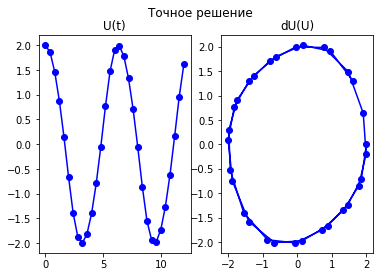

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)                    # Рисуем графики.
fig.suptitle('Точное решение')
ax1.plot(ts, us1, linestyle='-', marker='o', color='b')
ax1.set_title("U(t)")
ax2.plot(us1, us2, linestyle='-', marker='o', color='b')
ax2.set_title("dU(U)")
plt.show()

## Внесение погрешности

In [17]:
e = e*0.75
w = w*0.75
f"Эпсилон = {e}, Омега = {w}"

'Эпсилон = 0.14999999518129747, Омега = 0.7499996467544134'

In [18]:
_h = 0.4
_t = np.array([0.0, 12.0])
_uinit = np.array([2.0, 0.0])
[_ts, _us] = RKF45('myFunc', _uinit, _t, _h)
node = len(_uinit)
_us1 = _us[0::node]
_us2 = _us[1::node]
_dataRKF = zip(_ts, _us1, _us2)
print("t\tu(t)\t\tu'(t)")
for (_t, _u, _du) in list(_dataRKF):
    print(f"%.1f\t%+f\t%+f" %(_t, _u, _du))

t	u(t)		u'(t)
0.0	+2.000000	+0.000000
0.4	+1.915625	-0.407702
0.8	+1.684355	-0.737308
1.2	+1.333195	-1.011058
1.6	+0.880653	-1.245423
2.0	+0.342926	-1.433013
2.4	-0.253900	-1.530458
2.8	-0.859595	-1.464620
3.2	-1.396595	-1.184805
3.6	-1.784216	-0.733916
4.0	-1.977244	-0.233433
4.4	-1.978216	+0.215350
4.8	-1.816156	+0.581722
5.2	-1.521895	+0.880353
5.6	-1.117875	+1.133426
6.0	-0.620243	+1.347299
6.4	-0.048342	+1.497508
6.8	+0.561163	+1.522599
7.2	+1.143228	+1.351010
7.6	+1.613928	+0.973105
8.0	+1.906340	+0.481030
8.4	+2.000301	-0.001789
8.8	+1.915267	-0.409204
9.2	+1.683449	-0.738559
9.6	+1.331824	-1.012142
10.0	+0.878876	-1.246371
10.4	+0.340808	-1.433742
10.8	-0.256228	-1.530729
11.2	-0.861887	-1.464128
11.6	-1.398517	-1.183468
12.0	-1.785486	-0.732075


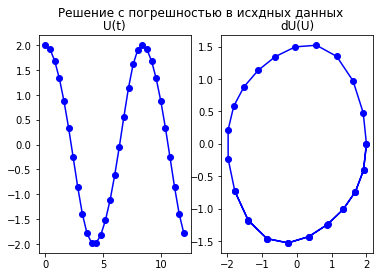

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Решение с погрешностью в исхдных данных')
ax1.plot(_ts, _us1, linestyle='-', marker='o', color='b')
ax1.set_title("U(t)")
ax2.plot(_us1, _us2, linestyle='-', marker='o', color='b')
ax2.set_title("dU(U)")
plt.show()

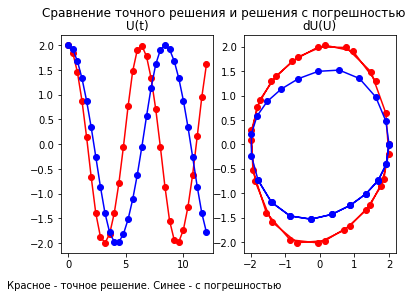

In [21]:
# Далее рисуем вместе точное решение и решение с погрешностью
fig, (ax1, ax2) = plt.subplots(1, 2)                              
fig.suptitle('Сравнение точного решения и решения с погрешностью')
ax1.plot(ts, us1, linestyle='-', marker='o', color='r')
ax1.plot(_ts, _us1, linestyle='-', marker='o', color='b')
ax1.set_title("U(t)")
ax2.plot(us1, us2, linestyle='-', marker='o', color='r')
ax2.plot(_us1, _us2, linestyle='-', marker='o', color='b')
ax2.set_title("dU(U)")
fig.text(0, 0, "Красное - точное решение. Синее - с погрешностью")
plt.show()

## Исследование параметров Эпсилон и Омега
Для полученного решения будем менять данные параметры для выявления зависимостей

In [12]:
def buildGraph():
    h = 0.1
    t = np.array([0.0, 12.0])
    uinit = np.array([2.0, 0.0])
    [ts, us] = RKF45('myFunc', uinit, t, h)
    node = len(uinit)
    us1 = us[0::node]
    us2 = us[1::node]
    dataRKF = zip(ts, us1, us2)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(ts, us1, linestyle='-', marker='', color='b')
    ax1.set_title("U(t)")
    ax2.plot(us1, us2, linestyle='-', marker='', color='b')
    ax2.set_title("dU(U)")
    fig.suptitle(f"e = {e} w = {w}")
    plt.show()

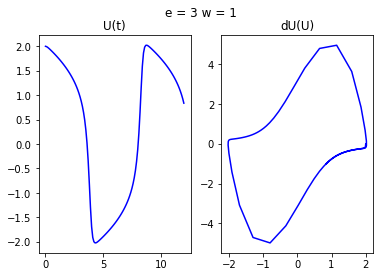

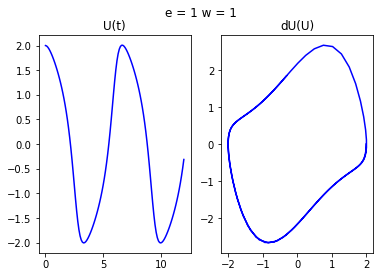

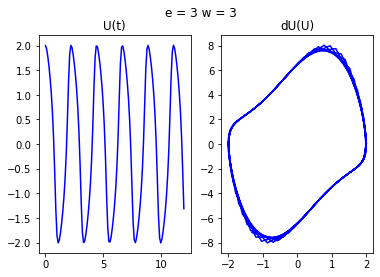

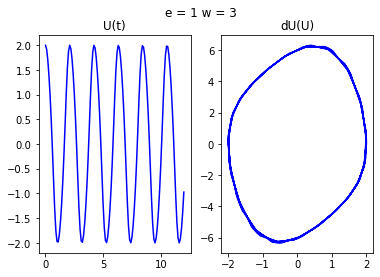

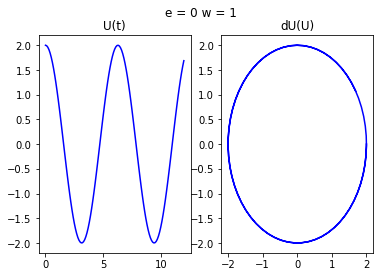

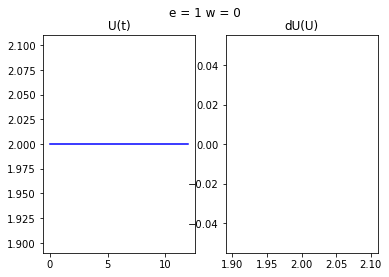

In [13]:
e = 3
w = 1
buildGraph()
e = 1
w = 1
buildGraph()
e = 3
w = 3
buildGraph()
e = 1
w = 3
buildGraph()
e = 0
w = 1
buildGraph()
e = 1
w = 0
buildGraph()